# Getting Started: Loading and Preping the Data

Downloading the File.

In [ ]:
!unzip '/content/drive/My Drive/kaggle/nlp-getting-started.zip' -d '/content/drive/My Drive/kaggle'

Archive:  /content/drive/My Drive/kaggle/nlp-getting-started.zip
replace /content/drive/My Drive/kaggle/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np 
import pandas as pd 
from keras.optimizers import Adam
from keras.initializers import Constant
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from keras.models import Sequential
from keras import layers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from keras.layers import Conv1D,MaxPooling1D, Flatten
from keras.layers import LSTM,Dense,SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

stop=set(stopwords.words('english'))
plt.style.use('ggplot')
#fnction to make the logs for history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/kaggle/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/kaggle/test.csv")

import re
#function to clean the data
def clean_review(text):
    # Strip HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    text = re.sub("[!@#$+%*:()'-]", ' ', text)
    text = ''.join([i for i in text if not i.isdigit()])
    # Strip escaped quotes
    text = text.replace('\\"', '')
 
    # Strip quotes
    text = text.replace('"', '')
    
 
    return text    
            
# clean the data    
train_df['text']=train_df['text'].apply(clean_review)
test_df['text']=test_df['text'].apply(clean_review)
train_df.tail()

y=train_df["target"].values
from sklearn.model_selection import train_test_split
# train test split
x_train, x_test, y_train, y_test = train_test_split(train_df["text"].values, y, test_size=0.25, random_state=1000)

In [ ]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria ahrary thetawniest the out of control w...,1
7610,10871,NaN,NaN,m utc km s of volcano hawaii htt...,1
7611,10872,NaN,NaN,police investigating after an e bike collided ...,1
7612,10873,NaN,NaN,the latest more homes razed by northern calif...,1


In [ ]:
train_df.shape

(7613, 5)

In [ ]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
train_df.keyword.nunique()

221

In [ ]:
train_df.location.nunique()

3341

In [ ]:
train_df.text.nunique()

7485

Text(0, 0.5, 'Frequency of disaster')

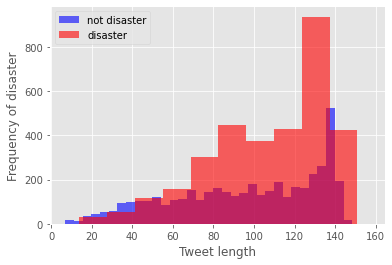

In [ ]:
train_df['message_len'] = train_df['text'].apply(len)

plt.figure()

train_df[train_df['target']==0].message_len.plot(bins=35, kind='hist', color='blue', label='not disaster', alpha=0.6)
train_df[train_df['target']==1].message_len.plot(kind='hist', color='red', label='disaster', alpha=0.6)
plt.legend()
plt.xlabel("Tweet length")
plt.ylabel("Frequency of disaster")



# Setting up the Vectorizors

In [ ]:
# using the count_vectorizer to fit the data
count_vectorizer = feature_extraction.text.CountVectorizer(stop_words='english',max_df=0.5,min_df=2)

x_train1 = count_vectorizer.fit_transform(x_train)
x_test1 = count_vectorizer.transform(x_test)

#using the tFIDF vectorizer to fit the data
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf.fit(train_df['text'].values)
X_trainT = tfidf.transform(x_train)
X_testT = tfidf.transform(x_test)


#  Ridge Regression with count vectorizors

In [ ]:
# Fiting the model and scoring the model on the test data. 
clf = linear_model.RidgeClassifier()
clf.fit(x_train1, y_train)
score = clf.score(x_test1, y_test)
print("Accuracy for ridge regression with count vectorizors:", score)
RRscore=score

Accuracy for ridge regression with count vectorizors: 0.7741596638655462


# Ridge Regression with tfidf vectorizors

In [ ]:
clf2 = linear_model.RidgeClassifier()
clf2.fit(X_trainT, y_train)
score = clf2.score(X_testT, y_test)
print("Accuracy for ridge regression with tfidf:", score)
RRscore2=score

Accuracy for ridge regression: 0.8077731092436975


The ridge regression was only a model to be used for practice. It was not used for submission on kaggle

#  logistic regression with count vectorizor

In [ ]:
#performing the fitting and scoring for logistic regression
log = LogisticRegression(max_iter=100000,solver='liblinear')
log.fit(X_train1, y_train)
score = log.score(X_test1, y_test)
print("Accuracy for logistic regression with count vectorizor:", score)
LRscore=score

Accuracy for basic logistic regression: 0.805672268907563


# Logistic Regression with tfidf vectorizor

In [ ]:

#performing the fitting and scoring for logistic regression
log2 = LogisticRegression(max_iter=100000,solver='liblinear')
log2.fit(X_trainT, y_train)
score = log2.score(X_testT, y_test)
print("Accuracy for logistic regression with tfidf vectorizors:", score)
LRscore2=score

Accuracy for logistic regression with tfidf vectorizors: 0.8040966386554622


In [ ]:
test_vectors=vec.transform(test_df["text"].values)
sample_submission = pd.read_csv("/content/drive/My Drive/kaggle/sample_submission.csv")
sample_submission["target"] = log.predict(test_vectors)
sample_submission.head()
sample_submission.to_csv("submission.csv", index=False)

For machine learning, log regression with count vectorizors was selected to be  a model for submission and was submitted to kaggle. a score of 0.79282 was obtained for the this model.



 # Linear SVM with count vectorizor

In [ ]:
LSVM=SVC()
LSVM.fit(X_train1, y_train)
score = LSVM.score(X_test1, y_test)
print("Accuracy for Linear SVMs with count vectorizor:", score)
LSVMscore=score

Accuracy for Linear SVMs: 0.8125


In [ ]:
parameters = { 
    'gamma': [0.7, 1, 'auto', 'scale']
}
model2 = GridSearchCV(SVC(kernel='rbf'), parameters, cv=4, n_jobs=-1).fit(X_trainT, y_train)
score = model2.score(X_testT, y_test)
print("Accuracy for Linear SVMs with tfidf vectorizor", score)
LSVMscore=score

Accuracy for Linear SVMs with tfidf vectorizor 0.8061974789915967


In [ ]:
test_vectors=vec.transform(test_df["text"].values)
sample_submission = pd.read_csv("/content/drive/My Drive/kaggle/sample_submission.csv")
sample_submission["target"] = LSVM.predict(test_vectors)
sample_submission.head()
sample_submission.to_csv("submission.csv", index=False)

For machine learning, Linear support vector machines was selected to be model for submission and was submitted to kaggle. a score of 0.79650 was obtained for the this model as well

Linear SVM had higher accuracy and a higher Score on the test data.

# Linear SVM with tfidf vectorizor



In [ ]:
LSVM2=SVC()
LSVM2.fit(X_trainT, y_train)
score = LSVM2.score(X_testT, y_test)
print("Accuracy for Linear SVMs with t:", score)
LSVMscore2=score

Accuracy for Linear SVMs: 0.803046218487395


# Deep Learning: Plain Dense Model

In [ ]:

input_dim = X_train1.shape[1]
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                221020    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 221,031
Trainable params: 221,031
Non-trainable params: 0
_________________________________________________________________


Training for 4 epoch
Training Accuracy: 0.9800
Training loss: 0.0682
Testing Accuracy:  0.7978
Testing loss: 0.5021


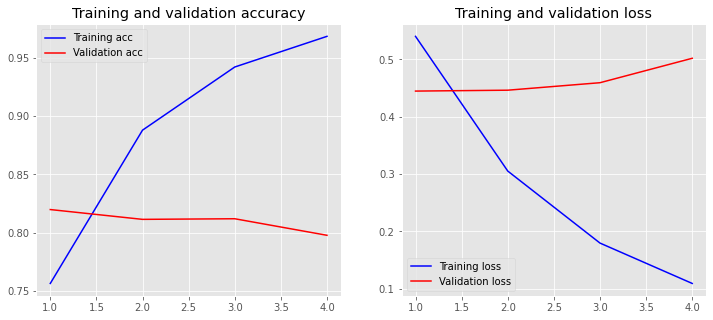

In [ ]:
history = model.fit(X_train1, y_train, epochs=4, verbose=False, validation_data=(X_test1, y_test),batch_size=10)
print('Training for 4 epoch')
loss, accuracy = model.evaluate(X_train1, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training loss: {:.4f}".format(loss))
T1loss=loss
T1acc=accuracy
loss, accuracy = model.evaluate(X_test1, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing loss: {:.4f}".format(loss))
plot_history(history)
V1loss=loss
V1acc=accuracy

# Setting up word embeddings

In [ ]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df["text"].values)
X_train2 = tokenizer.texts_to_sequences(x_train)
X_test2 = tokenizer.texts_to_sequences(x_test)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train3 = pad_sequences(X_train2, padding='post', maxlen=maxlen)
X_test3 = pad_sequences(X_test2, padding='post', maxlen=maxlen)



# Keras Model with Word Embedding

In [ ]:

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalAveragePooling1D())
#model.add(layers.GlobalMaxPool1D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1106400   
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,106,921
Trainable params: 1,106,921
Non-trainable params: 0
_________________________________________________________________


Training Accuracy:  0.8476090431213379
Training loss:  0.37410464882850647
Testing Accuracy:   0.818802535533905
Testing loss:  0.44107723236083984


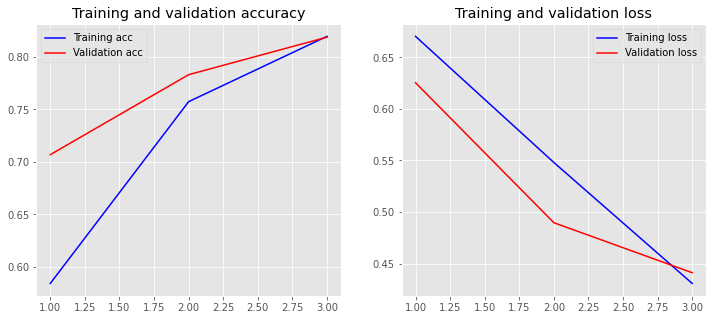

In [ ]:
history = model.fit(X_train3, y_train,
                    epochs=3,
                    verbose=False,
                    validation_data=(X_test3, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train3, y_train, verbose=False)
print("Training Accuracy: ",(accuracy))
print("Training loss: ",(loss))
T2loss=loss
T2acc=accuracy
loss, accuracy = model.evaluate(X_test3, y_test, verbose=False)
print("Testing Accuracy:  ",(accuracy))
print("Testing loss: ",(loss))
plot_history(history)
V2loss=loss
V2acc=accuracy

# Deep Learning: ConvNet

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2212800   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,278,229
Trainable params: 2,278,229
Non-trainable params: 0
_________________________________________________________________


Training Accuracy:  0.9884393215179443
Training loss:  0.02271762490272522
Testing Accuracy:  0.7731092572212219
Testing loss:  1.0372073650360107


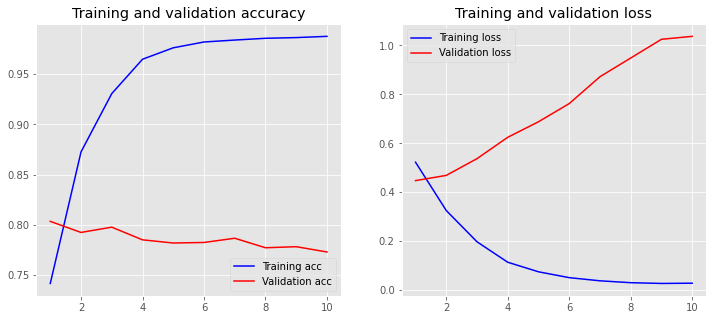

In [ ]:
history = model.fit(X_train3, y_train, epochs=10,verbose=False,validation_data=(X_test3, y_test),batch_size=10)
loss, accuracy = model.evaluate(X_train3, y_train, verbose=False)
print("Training Accuracy: ",(accuracy))
print("Training loss: ",(loss))
T3loss=loss
T3acc=accuracy
loss, accuracy = model.evaluate(X_test3, y_test, verbose=False)
print("Testing Accuracy: ",(accuracy))
print("Testing loss: ",(loss))
plot_history(history)
Vloss=loss
V3acc=accuracy

# Deep Learning: LSTM

In [ ]:

embedding_dim = 64

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))

model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(16))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 64)           1416192   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 64)           33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 32)           12416     
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

Epoch 1/50
45/45 [==============================] - 21s 476ms/step - loss: 0.6849 - accuracy: 0.5679 - val_loss: 0.6838 - val_accuracy: 0.5783
Epoch 2/50
45/45 [==============================] - 21s 464ms/step - loss: 0.6845 - accuracy: 0.5677 - val_loss: 0.6830 - val_accuracy: 0.5783
Epoch 3/50
45/45 [==============================] - 20s 453ms/step - loss: 0.6844 - accuracy: 0.5677 - val_loss: 0.6815 - val_accuracy: 0.5783
Epoch 4/50
45/45 [==============================] - 20s 453ms/step - loss: 0.6846 - accuracy: 0.5677 - val_loss: 0.6818 - val_accuracy: 0.5783
Epoch 5/50
45/45 [==============================] - 20s 450ms/step - loss: 0.6843 - accuracy: 0.5677 - val_loss: 0.6810 - val_accuracy: 0.5783
Epoch 6/50
45/45 [==============================] - 20s 447ms/step - loss: 0.6842 - accuracy: 0.5677 - val_loss: 0.6809 - val_accuracy: 0.5783
Epoch 7/50
45/45 [==============================] - 20s 447ms/step - loss: 0.6841 - accuracy: 0.5677 - val_loss: 0.6815 - val_accuracy: 0.5783

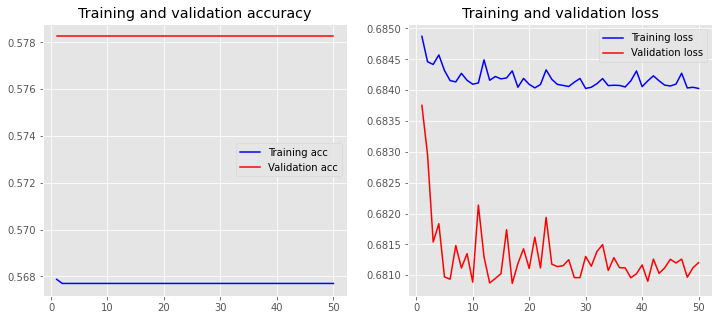

In [ ]:
history = model.fit(X_train3, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test3, y_test),
                    batch_size=128)
loss, accuracy = model.evaluate(X_train3, y_train, verbose=False)
print("Training Accuracy: ",(accuracy))
print("Training loss: ",(loss))
T4loss=loss
T4acc=accuracy
loss, accuracy = model.evaluate(X_test3, y_test, verbose=False)
print("Testing Accuracy: ",(accuracy))
print("Testing loss: ",(loss))
V4loss=loss
V4acc=accuracy
plot_history(history)

# Deep learning: LSTM + GLOVE EMBEDDING


Here GloVe pretrained model is used to help with word embedding

In [ ]:
!wget http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
!unzip glove.6B.zip

--2020-08-12 23:59:08--  http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.6B.zip [following]
--2020-08-12 23:59:08--  https://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip [following]
--2020-08-12 23:59:08--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [applic

In [ ]:
def create_corpus(df):
    corpus=[]
    for tweet in df['text']:
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus=create_corpus(train_df)
embedding_dict={}
with open('glove.6B.50d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')
word_index=tokenizer_obj.word_index
vocab_size=len(word_index)+1
embedding_matrix=np.zeros((vocab_size,50))

for word,i in word_index.items():
    if i > vocab_size:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec
X_train,X_val, y_train, y_val = train_test_split(tweet_pad,y, test_size=.2, random_state=2)

embedding_dim = 100



In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size,50, embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(16))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
optimizer=Adam(learning_rate=10e-4)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 50)            1098850   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 50, 50)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 50, 64)            29440     
_________________________________________________________________
lstm_19 (LSTM)               (None, 50, 32)            12416     
_________________________________________________________________
lstm_20 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

Epoch 1/100
48/48 [==============================] - 11s 228ms/step - loss: 0.4386 - accuracy: 0.8097 - val_loss: 0.4230 - val_accuracy: 0.8188
Epoch 2/100
48/48 [==============================] - 11s 223ms/step - loss: 0.4286 - accuracy: 0.8082 - val_loss: 0.4283 - val_accuracy: 0.8247
Epoch 3/100
48/48 [==============================] - 11s 224ms/step - loss: 0.4305 - accuracy: 0.8087 - val_loss: 0.4159 - val_accuracy: 0.8168
Epoch 4/100
48/48 [==============================] - 11s 221ms/step - loss: 0.4212 - accuracy: 0.8135 - val_loss: 0.4309 - val_accuracy: 0.8188
Epoch 5/100
48/48 [==============================] - 11s 221ms/step - loss: 0.4177 - accuracy: 0.8153 - val_loss: 0.4198 - val_accuracy: 0.8181
Epoch 6/100
48/48 [==============================] - 11s 220ms/step - loss: 0.4215 - accuracy: 0.8120 - val_loss: 0.4251 - val_accuracy: 0.8207
Epoch 7/100
48/48 [==============================] - 11s 221ms/step - loss: 0.4149 - accuracy: 0.8138 - val_loss: 0.4191 - val_accuracy:

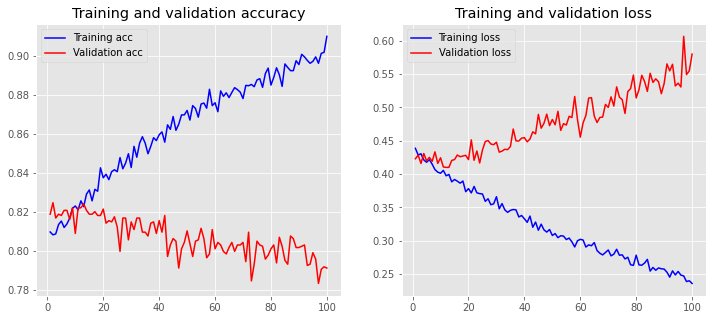

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    batch_size=128)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: ",(accuracy))
print("Training loss: ",(loss))
T6loss=loss
T6acc=accuracy
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Testing Accuracy: ",(accuracy))
print("Testing loss: ",(loss))
V6loss=loss
V6acc=accuracy
plot_history(history)

In [ ]:
#code to check the submission for the LSTM + GLOVE model
corpus2=create_corpus(test_df)
sequences2=tokenizer_obj.texts_to_sequences(corpus2)
tweet_pad2=pad_sequences(sequences2,maxlen=MAX_LEN,truncating='post',padding='post')
sample_submission = pd.read_csv("/content/drive/My Drive/kaggle/sample_submission.csv")
sample_submission["target"] = model.predict(tweet_pad2)
sample_submission.head()
sample_submission.to_csv("submission.csv", index=False)


# Results

In [ ]:

# preparing the labels for the graphs
label=['Ridge regression','logistic regression','Linear SVM']
score=[RRscore,LRscore,LSVMscore]

label2= ['Dense NN','Dense with word','CNN','LSTM','LSTM with glove']
Score2=[V1acc,V2acc,V3acc,V4acc,V6acc]
Score3=[V1loss,V2loss,Vloss,V4loss,V6loss]
Score4=[T1acc,T2acc,T3acc,T4acc,T6acc]
Score5=[T1loss,T2loss,T3loss,T4loss,T6loss]

label3=['logistic regression','Linear SVM','LSTM with glove']
score6=[0.79282,0.79650,0]

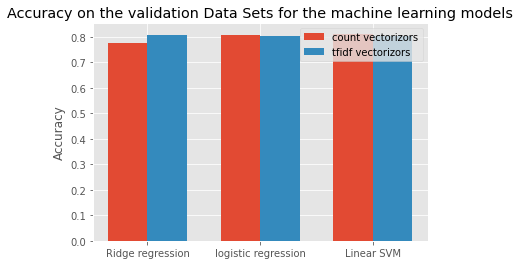

In [ ]:
#making the graphs for the machine learning models
label=['Ridge regression','logistic regression','Linear SVM']
score=[RRscore,LRscore,LSVMscore]
score2=[RRscore2,LRscore2,LSVMscore2]

fig, ax = plt.subplots()
x = np.arange(len(label))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, score, width, label='count vectorizors')
rects2 = ax.bar(x + width/2, score2, width, label='tfidf vectorizors')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy on the validation Data Sets for the machine learning models')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

plt.show()

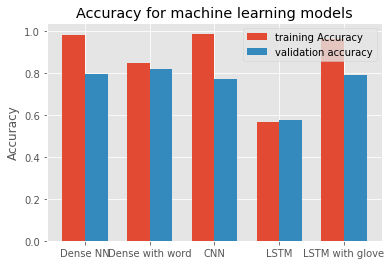

In [ ]:
#making the graph for the accuracy of the deep learning models
fig, ax = plt.subplots()
x = np.arange(len(label2))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, Score4, width, label='training Accuracy ')
rects2 = ax.bar(x + width/2, Score2, width, label='validation accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for machine learning models')
ax.set_xticks(x)
ax.set_xticklabels(label2)
ax.legend()

plt.show()

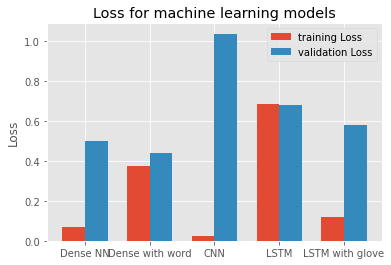

In [ ]:
#making the graph for the accuracy of the deep learning models
fig, ax = plt.subplots()
x = np.arange(len(label2))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, Score5, width, label='training Loss')
rects2 = ax.bar(x + width/2, Score3, width, label='validation Loss')

ax.set_ylabel('Loss')
ax.set_title('Loss for machine learning models')
ax.set_xticks(x)
ax.set_xticklabels(label2)
ax.legend()

plt.show()

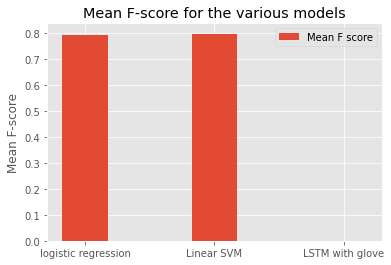

In [ ]:
fig, ax = plt.subplots()
x = np.arange(len(label3))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x , score6, width, label='Mean F score')


ax.set_ylabel('Mean F-score')
ax.set_title('Mean F-score for the various models')
ax.set_xticks(x)
ax.set_xticklabels(label3)
ax.legend()

plt.show()

# Sources

Sources:

* https://www.kaggle.com/philculliton/nlp-getting-started-tutorial 
* https://keras.io/api/

* https://scikit-learn.org/stable/modules/classes.html
* https://medium.com/@dobko_m/
nlp-text-data-cleaning-and-preprocessing-ea3ffe0406c1
* https://github.com/stanfordnlp/GloVe
* https://www.nltk.org/api/nltk.html
* https://www.youtube.com/watch?v=j7EB7yeySDw
* https://nlpforhackers.io/keras-intro/
* https://realpython.com/python-keras-text-classification/#what-is-a-word-embedding
* https://www.kaggle.com/darthmanav/glove-lstm-sentiment-analysis-for-beginners#Creating-Our-Model.





